In [1]:
import requests
from http import HTTPStatus
import pandas as pd
import numpy as np


In [2]:

    """
    Downloads and trasnforms JSON data into a pandas DataFrame for analysis.
    Raises if file download is not succesful.
 
    Parameters
    ----------
    url : string
        The URL where the JSON file exists.
 
    Returns
    -------
    DataFrame
        A pandas dataframe.
    """

'\nDownloads and trasnforms JSON data into a pandas DataFrame for analysis.\nRaises if file download is not succesful.\n \nParameters\n----------\nurl : string\n    The URL where the JSON file exists.\n \nReturns\n-------\nDataFrame\n    A pandas dataframe.\n'

In [3]:
def download_and_transform_json(url) -> pd.DataFrame:
    
    download = requests.get(url)
    if download.status_code != HTTPStatus.OK:
        raise requests.HTTPError(f"failed to download data, got not 200 status code, url: {url}")
    data = download.json()

    seriesDetail = dict(data["seriesDetail"])
    seriesDetail = {k: v["label"] for k, v in seriesDetail.items()}
    observations = data["observations"]

    df = pd.DataFrame(list(map(lambda obs: {k: v["v"] if type(v) is dict else v for k, v in obs.items()}, observations)))
    df = df.rename(columns=seriesDetail)
    return df

df_treasury_bills = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_TBILL/json")
df_cash_mgmnt_bills = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_TBILL_C/json")
df_nominal_bonds = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_BOND/json")
df_ultra_long_bonds = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_BOND_U/json")
df_real_return_bonds = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_BOND_RR/json")
df_cash_mgmnt_bond_buybacks = download_and_transform_json("https://www.bankofcanada.ca/valet/observations/group/AUC_BOND_R/json")



In [4]:
df_treasury_bills

,tbill_id,Auction date,Issue date,ISIN,Term (days),Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),...,Bidding deadline,Of which held by Bank of Canada ($M),Total amount ($M),Total amount maturing ($M),Status,Outstanding prior ($M),Allotment ratio (%),Total Non-Comp Submitted by GSD ($M),Outstanding after ($M),Total Submitted by GSD ($M)
0,HIST_TBILL_3,1998-10-13,1998-10-15,CA1350Z7NS93,98,1999-01-21,3300.000,98.76135,4.671,4.666,...,12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_TBILL_2,1998-10-13,1998-10-15,CA1350Z7NY61,182,1999-04-15,1500.000,97.63521,4.857,4.834,...,12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_TBILL_1,1998-10-13,1998-10-15,CA1350Z7PL23,364,1999-10-14,1400.000,95.44925,4.781,4.740,...,12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_TBILL_6,1998-10-27,1998-10-29,CA1350Z7NT76,98,1999-02-04,3300.000,98.74221,4.744,4.732,...,12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_TBILL_5,1998-10-27,1998-10-29,CA1350Z7NY61,168,1999-04-15,1500.000,97.84132,4.793,4.770,...,12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,19002023510-3,2023-10-24,2023-10-26,CA1350Z7CD44,350,2024-10-10,4200.000,95.21747,5.238,5.225,...,10:30,NaN,NaN,NaN,Results,4200.000,32.00000,15.000,8400.000,9056.150
2056,19002024279,2023-11-07,2023-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10:30,0.000,20000,20200.000,Final CFT,NaN,NaN,NaN,NaN,NaN
2057,19002024279-1,2023-11-07,2023-11-09,CA1350Z7B785,98,2024-02-15,11600.000,NaN,NaN,NaN,...,10:30,NaN,NaN,NaN,Final CFT,10600.000,NaN,NaN,NaN,NaN
2058,19002024279-2,2023-11-07,2023-11-09,CA1350Z7CE27,182,2024-05-09,4200.000,NaN,NaN,NaN,...,10:30,NaN,NaN,NaN,Final CFT,0.000,NaN,NaN,NaN,NaN


In [5]:
df_cash_mgmnt_bills

,tbill_id,Auction date,Issue date,ISIN,Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),High yield (%),...,Bank of Canada purchase ($M),Total amount maturing ($M),Of which held by Bank of Canada ($M),Status,Term (days),Outstanding prior ($M),Outstanding after ($M),Allotment ratio (%),Total submitted by GSD ($M),Total non-comp submitted by GSD ($M)
0,HIST_TBILL_C_1,1998-10-21,1998-10-22,CA1350Z7NN07,1998-11-26,3000.000,99.52025,5.027,4.850,5.125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_TBILL_C_2,1998-11-04,1998-11-05,CA1350Z7NP54,1998-12-10,1000.000,99.52684,4.958,4.930,4.978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_TBILL_C_3,1998-11-25,1998-11-26,CA1350Z7NR11,1999-01-07,3000.000,99.44888,4.816,4.810,4.827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_TBILL_C_4,1998-11-30,1998-12-01,CA1350Z7NR11,1999-01-07,2500.000,99.51084,4.849,4.820,4.868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_TBILL_C_5,1999-01-26,1999-01-27,CA1350Z7NT76,1999-02-04,2000.000,99.89016,5.017,4.950,5.050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,19002022687-1,2023-08-21,2023-08-21,CA1350Z7BG83,2023-09-14,4000.000,99.66937,5.045,5.018,5.060,...,NaN,NaN,NaN,Results,24,18400.000,22400.000,52.41350,7165.346,12.000
517,19002023475,2023-08-31,2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,21000.000,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN
518,19002023475-1,2023-08-31,2023-08-31,CA1350Z7CB87,2023-09-15,3500.000,99.79253,5.059,5.040,5.069,...,NaN,NaN,NaN,Results,15,0.000,3500.000,51.04000,10487.000,12.000
519,19002023483,2023-09-20,2023-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_nominal_bonds

,bond_id,Auction key,Auction date,Issue date,ISIN,Term (years),Maturity date,Coupon rate,Amount ($M),Avg price,...,Total amount maturing ($M),Status,Accrued interest end date,Accrued interest rate per $1000,Accrued interest start date,Outstanding including reconstituted ($M),Outstanding prior ($M),Allotment ratio (%),Total Non-Comp Submitted by GSD ($M),Total Submitted by GSD ($M)
0,1998-10-28_HIST_BOND_1,HIST_BOND_1,1998-10-28,1998-11-02,CA135087WL43,30,2029-06-01,5.750,1700.000,104.866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-11-04_HIST_BOND_2,HIST_BOND_2,1998-11-04,1998-11-16,CA135087WR13,10,2009-06-01,5.500,2300.000,102.476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-11-25_HIST_BOND_3,HIST_BOND_3,1998-11-25,1998-12-01,CA135087WN09,5,2003-09-01,5.250,2500.000,100.814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-12-09_HIST_BOND_4,HIST_BOND_4,1998-12-09,1998-12-15,CA135087WT78,2,2001-06-01,4.500,3500.000,99.480,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-02-10_HIST_BOND_5,HIST_BOND_5,1999-02-10,1999-02-15,CA135087WR13,10,2009-06-01,5.500,2300.000,103.285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
834,2023-10-30_19002024282-1,19002024282-1,2023-10-30,2023-11-01,CA135087R226,2,2026-02-01,4.500,5500.000,99.793,...,NaN,Results,NaN,NaN,NaN,0.000,0.000,50.97701,33.000,13555.000
835,2023-11-02_19002024281,19002024281,2023-11-02,2023-11-06,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,2023-11-02_19002024281-1,19002024281-1,2023-11-02,2023-11-06,CA135087P998,30,2055-12-01,2.750,1250.000,82.394,...,NaN,Results,2023-11-06,11.90410959,2023-06-01,8000.000,8000.000,10.69444,40.000,3398.000
837,2023-11-08_19002025073,19002025073,2023-11-08,2023-11-10,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,Final CFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_ultra_long_bonds

,bond_id,Auction key,Auction date,Issue date,ISIN,Term (years),Maturity date,Coupon rate,Allotment yield (%),Allotment price,...,Total amount maturing ($M),Status,Accrued interest end date,Accrued interest rate per $1000,Accrued interest start date,Outstanding including reconstituted ($M),Outstanding prior ($M),Allotment ratio (%),Total Non-Comp Submitted by GSD ($M),Total Submitted by GSD ($M)
0,HIST_BOND_U_1,HIST_BOND_U_1,2014-04-28,2014-05-01,CA135087C939,50,2064-12-01,2.750,2.960,94.512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_BOND_U_2,HIST_BOND_U_2,2014-07-10,2014-07-15,CA135087C939,50,2064-12-01,2.750,2.764,99.619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_BOND_U_3,HIST_BOND_U_3,2014-11-20,2014-11-25,CA135087C939,50,2064-12-01,2.750,2.575,104.906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_BOND_U_4,HIST_BOND_U_4,2017-08-29,2017-09-01,CA135087C939,50,2064-12-01,2.750,2.220,115.460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_BOND_U_5,HIST_BOND_U_5,2017-11-16,2017-11-20,CA135087C939,50,2064-12-01,2.750,2.251,114.431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,HIST_BOND_U_6,HIST_BOND_U_6,2021-05-18,2021-05-20,CA135087C939,50,2064-12-01,2.750,2.250,113.832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,HIST_BOND_U_7,HIST_BOND_U_7,2021-09-23,2021-09-27,CA135087C939,50,2064-12-01,2.750,1.923,124.183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,HIST_BOND_U_8,HIST_BOND_U_8,2021-11-04,2021-11-08,CA135087C939,50,2064-12-01,2.750,2.113,117.952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19002005629,19002005629,2022-03-23,2022-03-25,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,19002005629-1,19002005629-1,2022-03-23,2022-03-25,CA135087C939,50,2064-12-01,2.750,2.603,103.773,...,NaN,Results,2022-03-25,8.58904110,2021-12-01,7750.000,7750.000,70.00000,33.000,1585.600


In [8]:
df_real_return_bonds

,bond_id,Auction key,Auction date,Issue date,Term (years),Maturity date,Coupon rate,ISIN,Amount ($M),Outstanding after ($M),...,Index ratio,Total amount maturing ($M),Status,Accrued interest end date,Accrued interest rate per $1000,Accrued interest start date,Outstanding prior ($M),Allotment ratio (%),Total non-comp submitted by GSD ($M),Total submitted by GSD ($M)
0,HIST_BOND_RR_1,HIST_BOND_RR_1,1998-12-02,1998-12-07,30,2026-12-01,4.250,CA135087VS05,400.000,5250.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_BOND_RR_2,HIST_BOND_RR_2,1999-03-03,1999-03-08,30,2031-12-01,4.000,CA135087WV25,400.000,400.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_BOND_RR_3,HIST_BOND_RR_3,1999-06-02,1999-06-08,30,2031-12-01,4.000,CA135087WV25,300.000,700.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_BOND_RR_4,HIST_BOND_RR_4,1999-09-01,1999-09-07,30,2031-12-01,4.000,CA135087WV25,300.000,1000.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_BOND_RR_5,HIST_BOND_RR_5,1999-12-01,1999-12-06,30,2031-12-01,4.000,CA135087WV25,300.000,1300.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,19002005551-1,19002005551-1,2022-03-09,2022-03-11,30,2054-12-01,0.250,CA135087M433,300.000,1400.000,...,NaN,NaN,Results,2022-03-11,0.70821918,2021-12-01,1100.000,31.20000,29.200,795.200
94,19002005910,19002005910,2022-05-26,2022-05-30,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0651100,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,19002005910-1,19002005910-1,2022-05-26,2022-05-30,30,2054-12-01,0.250,CA135087M433,400.000,1800.000,...,NaN,NaN,Results,2022-05-30,1.31314932,2021-12-01,1400.000,8.50000,28.000,850.150
96,19002007789,19002007789,2022-09-01,2022-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0949600,0.000,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_cash_mgmnt_bond_buybacks

,bond_id,Auction key,Auction date,Settlement date,Total amount repurchased ($M),Bidding deadline,ISIN,Maturity date,Coupon rate,Amount repurchased ($M),Cutoff yield (%),Maximum total repurchase ($M),Status,Outstanding prior ($M),Accrued interest start date,Accrued interest end date,Accrued interest rate per $1000,Outstanding after ($M),Allotment ratio (%)
0,HIST_BOND_R_OV_1,HIST_BOND_R_OV_1,2001-01-16,2001-01-18,500.000,10:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_BOND_R_6,HIST_BOND_R_6,2001-01-16,2001-01-18,NaN,10:30,CA135087VR22,2001-03-01,7.500,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_BOND_R_7,HIST_BOND_R_7,2001-01-16,2001-01-18,NaN,10:30,CA135087TX28,2001-03-01,10.500,8.342,5.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_BOND_R_4,HIST_BOND_R_4,2001-01-16,2001-01-18,NaN,10:30,CA135087WT78,2001-06-01,4.500,239.758,5.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_BOND_R_5,HIST_BOND_R_5,2001-01-16,2001-01-18,NaN,10:30,CA135087UA06,2001-06-01,9.750,251.900,5.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,19002024674-5,19002024674-5,2023-11-07,2023-11-09,NaN,11:15,CA135087M508,2024-10-01,0.750,NaN,NaN,NaN,Preliminary CFT,14000.000,2023-10-01,2023-11-09,0.80136986,NaN,NaN
5777,19002024674-6,19002024674-6,2023-11-07,2023-11-09,NaN,11:15,CA135087P402,2024-11-01,3.000,NaN,NaN,NaN,Preliminary CFT,15500.000,2023-11-01,2023-11-09,0.65753425,NaN,NaN
5778,19002024674-7,19002024674-7,2023-11-07,2023-11-09,NaN,11:15,CA135087P659,2025-02-01,3.750,NaN,NaN,NaN,Preliminary CFT,14750.000,2023-08-01,2023-11-09,10.27397260,NaN,NaN
5779,19002024674-8,19002024674-8,2023-11-07,2023-11-09,NaN,11:15,CA135087N340,2025-04-01,1.500,NaN,NaN,NaN,Preliminary CFT,12000.000,2023-10-01,2023-11-09,1.60273973,NaN,NaN


In [10]:
df= pd.concat(
        [
            df_treasury_bills,
            df_cash_mgmnt_bills,
            df_nominal_bonds,
            df_ultra_long_bonds,
            df_real_return_bonds,
            df_cash_mgmnt_bond_buybacks,
        ]
    )


In [11]:
df

,tbill_id,Auction date,Issue date,ISIN,Term (days),Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),...,Status,Accrued interest end date,Accrued interest rate per $1000,Accrued interest start date,Index ratio,Settlement date,Total amount repurchased ($M),Amount repurchased ($M),Cutoff yield (%),Maximum total repurchase ($M)
0,HIST_TBILL_3,1998-10-13,1998-10-15,CA1350Z7NS93,98,1999-01-21,3300.000,98.76135,4.671,4.666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HIST_TBILL_2,1998-10-13,1998-10-15,CA1350Z7NY61,182,1999-04-15,1500.000,97.63521,4.857,4.834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HIST_TBILL_1,1998-10-13,1998-10-15,CA1350Z7PL23,364,1999-10-14,1400.000,95.44925,4.781,4.740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HIST_TBILL_6,1998-10-27,1998-10-29,CA1350Z7NT76,98,1999-02-04,3300.000,98.74221,4.744,4.732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HIST_TBILL_5,1998-10-27,1998-10-29,CA1350Z7NY61,168,1999-04-15,1500.000,97.84132,4.793,4.770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,NaN,2023-11-07,NaN,CA135087M508,NaN,2024-10-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-09,NaN,NaN,NaN,NaN
5777,NaN,2023-11-07,NaN,CA135087P402,NaN,2024-11-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-09,NaN,NaN,NaN,NaN
5778,NaN,2023-11-07,NaN,CA135087P659,NaN,2025-02-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-09,NaN,NaN,NaN,NaN
5779,NaN,2023-11-07,NaN,CA135087N340,NaN,2025-04-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2023-11-09,NaN,NaN,NaN,NaN


In [12]:
df.isnull().sum()

tbill_id                                    6728
Auction date                                   0
Issue date                                  5781
ISIN                                         849
Term (days)                                 7291
Maturity date                                849
Amount ($M)                                 5932
Avg price                                   6040
Avg yield (%)                               6040
Low yield (%)                               6040
High yield (%)                              6040
Coverage                                    5939
Tail (Bps)                                  6040
Bank of Canada purchase ($M)                6808
Auction key                                    0
Bidding deadline                               3
Of which held by Bank of Canada ($M)        9158
Total amount ($M)                           9262
Total amount maturing ($M)                  9158
Status                                      8435
Outstanding prior ($

In [13]:
df.describe()

,tbill_id,Auction date,Issue date,ISIN,Term (days),Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),...,Status,Accrued interest end date,Accrued interest rate per $1000,Accrued interest start date,Index ratio,Settlement date,Total amount repurchased ($M),Amount repurchased ($M),Cutoff yield (%),Maximum total repurchase ($M)
count,2581,9309,3528,8460,2018,8460,3377,3269,3269,3269,...,2,1,1,1,3,5781,697,5074,1981,44
unique,2581,2163,1908,1116,28,1169,87,2994,2238,2082,...,1,1,1,1,3,698,296,952,1099,2
top,HIST_TBILL_3,2023-04-11,2023-08-31,CA135087C855,98,2012-06-01,3000.000,99.91033,1.042,0.930,...,Results,2022-03-25,8.58904110,2021-12-01,1.0340000,2023-04-06,500.000,0.000,1.000,2000
freq,1,16,6,81,639,223,255,4,8,11,...,2,1,1,1,1,12,135,3093,25,43


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9309 entries, 0 to 5780
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   tbill_id                                  2581 non-null   object
 1   Auction date                              9309 non-null   object
 2   Issue date                                3528 non-null   object
 3   ISIN                                      8460 non-null   object
 4   Term (days)                               2018 non-null   object
 5   Maturity date                             8460 non-null   object
 6   Amount ($M)                               3377 non-null   object
 7   Avg price                                 3269 non-null   object
 8   Avg yield (%)                             3269 non-null   object
 9   Low yield (%)                             3269 non-null   object
 10  High yield (%)                            3269 n

In [15]:
dfNEW = df.dropna(thresh=len(df) - 7000, axis=1)

# Now, 'df' will contain only the columns with fewer than 9000 null values

In [16]:
dfNEW

,tbill_id,Auction date,Issue date,ISIN,Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),High yield (%),Coverage,Tail (Bps),Bank of Canada purchase ($M),Auction key,Bidding deadline,bond_id,Coupon rate,Settlement date,Amount repurchased ($M)
0,HIST_TBILL_3,1998-10-13,1998-10-15,CA1350Z7NS93,1999-01-21,3300.000,98.76135,4.671,4.666,4.685,1.946,1.400,825,HIST_TBILL_3,12:30,NaN,NaN,NaN,NaN
1,HIST_TBILL_2,1998-10-13,1998-10-15,CA1350Z7NY61,1999-04-15,1500.000,97.63521,4.857,4.834,4.880,1.603,2.300,200,HIST_TBILL_2,12:30,NaN,NaN,NaN,NaN
2,HIST_TBILL_1,1998-10-13,1998-10-15,CA1350Z7PL23,1999-10-14,1400.000,95.44925,4.781,4.740,4.800,1.368,1.900,175,HIST_TBILL_1,12:30,NaN,NaN,NaN,NaN
3,HIST_TBILL_6,1998-10-27,1998-10-29,CA1350Z7NT76,1999-02-04,3300.000,98.74221,4.744,4.732,4.754,1.755,0.970,825,HIST_TBILL_6,12:30,NaN,NaN,NaN,NaN
4,HIST_TBILL_5,1998-10-27,1998-10-29,CA1350Z7NY61,1999-04-15,1500.000,97.84132,4.793,4.770,4.820,1.754,2.650,225,HIST_TBILL_5,12:30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5776,NaN,2023-11-07,NaN,CA135087M508,2024-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-5,11:15,19002024674-5,0.750,2023-11-09,NaN
5777,NaN,2023-11-07,NaN,CA135087P402,2024-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-6,11:15,19002024674-6,3.000,2023-11-09,NaN
5778,NaN,2023-11-07,NaN,CA135087P659,2025-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-7,11:15,19002024674-7,3.750,2023-11-09,NaN
5779,NaN,2023-11-07,NaN,CA135087N340,2025-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-8,11:15,19002024674-8,1.500,2023-11-09,NaN


In [17]:
dfNEW.isnull().sum()

tbill_id                        6728
Auction date                       0
Issue date                      5781
ISIN                             849
Maturity date                    849
Amount ($M)                     5932
Avg price                       6040
Avg yield (%)                   6040
Low yield (%)                   6040
High yield (%)                  6040
Coverage                        5939
Tail (Bps)                      6040
Bank of Canada purchase ($M)    6808
Auction key                        0
Bidding deadline                   3
bond_id                         2581
Coupon rate                     3378
Settlement date                 3528
Amount repurchased ($M)         4235
dtype: int64

In [18]:
dfNEW.to_csv('C:\\Users\\91964\\Desktop\\Solution\\dfnew.csv', index=True)

In [20]:
import pandas as pd
# Prompt the user to enter the file path
file_path = input("Enter the path to the CSV file: ")

# Read the CSV file into a DataFrame
try:
    dataframe= pd.read_csv(file_path)
    print("CSV file successfully loaded.")
    # You can now work with the 'df' DataFrame.
except FileNotFoundError:
    print("File not found. Please check the file path and try again.")
except pd.errors.EmptyDataError:
    print("The CSV file appears to be empty.")
except pd.errors.ParserError:
    print("There was an issue parsing the CSV file. Make sure it's a valid CSV.")



Enter the path to the CSV file: C:\Users\91964\Desktop\Assgnmnt\dfnew.csv
CSV file successfully loaded.


In [21]:
dataframe

,tbill_id,Auction date,Issue date,ISIN,Maturity date,Amount ($M),Avg price,Avg yield (%),Low yield (%),High yield (%),Coverage,Tail (Bps),Bank of Canada purchase ($M),Auction key,Bidding deadline,bond_id,Coupon rate,Settlement date,Amount repurchased ($M)
0,HIST_TBILL_3,13-10-1998,15-10-1998,CA1350Z7NS93,21-01-1999,3300.0,98.76135,4.671,4.666,4.685,1.946,1.40,825.0,HIST_TBILL_3,12:30,NaN,NaN,NaN,NaN
1,HIST_TBILL_2,13-10-1998,15-10-1998,CA1350Z7NY61,15-04-1999,1500.0,97.63521,4.857,4.834,4.880,1.603,2.30,200.0,HIST_TBILL_2,12:30,NaN,NaN,NaN,NaN
2,HIST_TBILL_1,13-10-1998,15-10-1998,CA1350Z7PL23,14-10-1999,1400.0,95.44925,4.781,4.740,4.800,1.368,1.90,175.0,HIST_TBILL_1,12:30,NaN,NaN,NaN,NaN
3,HIST_TBILL_6,27-10-1998,29-10-1998,CA1350Z7NT76,04-02-1999,3300.0,98.74221,4.744,4.732,4.754,1.755,0.97,825.0,HIST_TBILL_6,12:30,NaN,NaN,NaN,NaN
4,HIST_TBILL_5,27-10-1998,29-10-1998,CA1350Z7NY61,15-04-1999,1500.0,97.84132,4.793,4.770,4.820,1.754,2.65,225.0,HIST_TBILL_5,12:30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,NaN,07-11-2023,NaN,CA135087M508,01-10-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-5,11:15,19002024674-5,0.75,09-11-2023,NaN
9305,NaN,07-11-2023,NaN,CA135087P402,01-11-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-6,11:15,19002024674-6,3.00,09-11-2023,NaN
9306,NaN,07-11-2023,NaN,CA135087P659,01-02-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-7,11:15,19002024674-7,3.75,09-11-2023,NaN
9307,NaN,07-11-2023,NaN,CA135087N340,01-04-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19002024674-8,11:15,19002024674-8,1.50,09-11-2023,NaN


In [22]:
dataframe.isnull().sum()

tbill_id                        6728
Auction date                       0
Issue date                      5781
ISIN                             849
Maturity date                    849
Amount ($M)                     5932
Avg price                       6040
Avg yield (%)                   6040
Low yield (%)                   6040
High yield (%)                  6040
Coverage                        5939
Tail (Bps)                      6040
Bank of Canada purchase ($M)    6808
Auction key                        0
Bidding deadline                   3
bond_id                         2581
Coupon rate                     3378
Settlement date                 3528
Amount repurchased ($M)         4235
dtype: int64

In [23]:
dataframe = dataframe.dropna(subset=['ISIN'])

In [24]:
dataframe.isnull().sum()

tbill_id                        5931
Auction date                       0
Issue date                      5083
ISIN                               0
Maturity date                      0
Amount ($M)                     5083
Avg price                       5191
Avg yield (%)                   5191
Low yield (%)                   5191
High yield (%)                  5191
Coverage                        5090
Tail (Bps)                      5191
Bank of Canada purchase ($M)    5959
Auction key                        0
Bidding deadline                   3
bond_id                         2529
Coupon rate                     2529
Settlement date                 3377
Amount repurchased ($M)         3386
dtype: int64

In [25]:
dataframe.fillna(dataframe.mean(), inplace=True)

print(dataframe)

          tbill_id Auction date  Issue date          ISIN Maturity date  \
0     HIST_TBILL_3   13-10-1998  15-10-1998  CA1350Z7NS93    21-01-1999   
1     HIST_TBILL_2   13-10-1998  15-10-1998  CA1350Z7NY61    15-04-1999   
2     HIST_TBILL_1   13-10-1998  15-10-1998  CA1350Z7PL23    14-10-1999   
3     HIST_TBILL_6   27-10-1998  29-10-1998  CA1350Z7NT76    04-02-1999   
4     HIST_TBILL_5   27-10-1998  29-10-1998  CA1350Z7NY61    15-04-1999   
...            ...          ...         ...           ...           ...   
9304           NaN   07-11-2023         NaN  CA135087M508    01-10-2024   
9305           NaN   07-11-2023         NaN  CA135087P402    01-11-2024   
9306           NaN   07-11-2023         NaN  CA135087P659    01-02-2025   
9307           NaN   07-11-2023         NaN  CA135087N340    01-04-2025   
9308           NaN   07-11-2023         NaN  CA135087Q319    01-05-2025   

      Amount ($M)  Avg price  Avg yield (%)  Low yield (%)  High yield (%)  \
0     3300.000000  98

C:\Users\91964\AppData\Local\Temp/ipykernel_27124/898659805.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataframe.fillna(dataframe.mean(), inplace=True)
C:\Users\91964\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
dataframe.isnull().sum()

tbill_id                        5931
Auction date                       0
Issue date                      5083
ISIN                               0
Maturity date                      0
Amount ($M)                        0
Avg price                          0
Avg yield (%)                      0
Low yield (%)                      0
High yield (%)                     0
Coverage                           0
Tail (Bps)                         0
Bank of Canada purchase ($M)       0
Auction key                        0
Bidding deadline                   3
bond_id                         2529
Coupon rate                        0
Settlement date                 3377
Amount repurchased ($M)            0
dtype: int64

In [34]:
dataframe.to_csv('C:\\Users\\91964\\Desktop\\Solution\\dffinal.csv', index=True)

In [27]:
import pandas as pd

# Assuming you have a DataFrame called df
# Replace 'df' with the actual name of your DataFrame if it's different

# Select numerical columns
numerical_cols = df.select_dtypes(include=[int, float])

# Select categorical columns
categorical_cols = df.select_dtypes(include=[object])

# Print the list of numerical and categorical columns
print("Numerical Columns:")
print(numerical_cols.columns)

print("\nCategorical Columns:")
print(categorical_cols.columns)


Numerical Columns:
Index([], dtype='object')

Categorical Columns:
Index(['tbill_id', 'Auction date', 'Issue date', 'ISIN', 'Term (days)',
       'Maturity date', 'Amount ($M)', 'Avg price', 'Avg yield (%)',
       'Low yield (%)', 'High yield (%)', 'Coverage', 'Tail (Bps)',
       'Bank of Canada purchase ($M)', 'Auction key', 'Bidding deadline',
       'Of which held by Bank of Canada ($M)', 'Total amount ($M)',
       'Total amount maturing ($M)', 'Status', 'Outstanding prior ($M)',
       'Allotment ratio (%)', 'Total Non-Comp Submitted by GSD ($M)',
       'Outstanding after ($M)', 'Total Submitted by GSD ($M)', 'Type',
       'Total submitted by GSD ($M)', 'Total non-comp submitted by GSD ($M)',
       'bond_id', 'Term (years)', 'Coupon rate',
       'Bank of Canada minimum purchase ($M)', 'Accrued interest end date',
       'Accrued interest rate per $1000', 'Accrued interest start date',
       'Outstanding including reconstituted ($M)', 'Allotment yield (%)',
       'Allotment

In [28]:
column_data_types = dataframe.dtypes

# Print the data types of each column
print(column_data_types)

tbill_id                         object
Auction date                     object
Issue date                       object
ISIN                             object
Maturity date                    object
Amount ($M)                     float64
Avg price                       float64
Avg yield (%)                   float64
Low yield (%)                   float64
High yield (%)                  float64
Coverage                        float64
Tail (Bps)                      float64
Bank of Canada purchase ($M)    float64
Auction key                      object
Bidding deadline                 object
bond_id                          object
Coupon rate                     float64
Settlement date                  object
Amount repurchased ($M)         float64
dtype: object


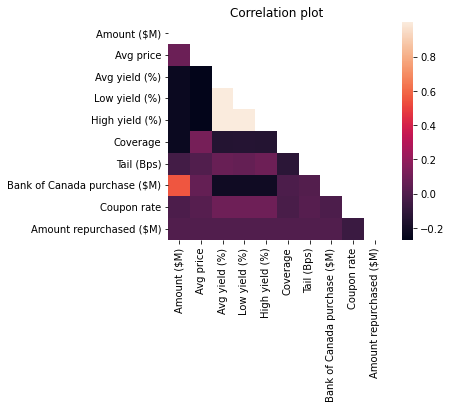

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# Calculate correlation between each pair of variable
corr_matrix=dataframe.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
ax = plt.axes()
sns.heatmap(corr_matrix, mask=mask, square=True, ax=ax)
ax.set_title('Correlation plot')
plt.show()





In [30]:
# Categorical columns
cat_col = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in dataframe.columns if dataframe[col].dtype != 'object']
print('Numerical columns :',num_col)



Categorical columns : ['tbill_id', 'Auction date', 'Issue date', 'ISIN', 'Maturity date', 'Auction key', 'Bidding deadline', 'bond_id', 'Settlement date']
Numerical columns : ['Amount ($M)', 'Avg price', 'Avg yield (%)', 'Low yield (%)', 'High yield (%)', 'Coverage', 'Tail (Bps)', 'Bank of Canada purchase ($M)', 'Coupon rate', 'Amount repurchased ($M)']


In [31]:
dataframe[cat_col].nunique()


tbill_id            2529
Auction date        2163
Issue date          1908
ISIN                1116
Maturity date       1169
Auction key         8460
Bidding deadline       8
bond_id             5931
Settlement date      698
dtype: int64

In [32]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler


X=dataframe[['Amount ($M)', 'Avg price', 'Avg yield (%)', 'Low yield (%)', 'High yield (%)', 'Coverage', 'Tail (Bps)', 'Bank of Canada purchase ($M)', 'Coupon rate', 'Amount repurchased ($M)']]


 
# initialising the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
 
# Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
# learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()



C:\Users\91964\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,Amount ($M),Avg price,Avg yield (%),Low yield (%),High yield (%),Coverage,Tail (Bps),Bank of Canada purchase ($M),Coupon rate,Amount repurchased ($M)
0,0.147783,0.498468,0.716319,0.717472,0.717200,0.299566,0.011689,0.100121,0.192188,0.048939
1,0.059113,0.479110,0.745089,0.743494,0.747334,0.221130,0.019203,0.024272,0.192188,0.048939
2,0.054187,0.441534,0.733333,0.728934,0.734971,0.167391,0.015864,0.021238,0.192188,0.048939
3,0.147783,0.498139,0.727610,0.727695,0.727863,0.255888,0.008099,0.100121,0.192188,0.048939
4,0.059113,0.482653,0.735189,0.733581,0.738062,0.255660,0.022126,0.027306,0.192188,0.048939


In [33]:
dataframe.describe()

,Amount ($M),Avg price,Avg yield (%),Low yield (%),High yield (%),Coverage,Tail (Bps),Bank of Canada purchase ($M),Coupon rate,Amount repurchased ($M)
count,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000,8460.000000
mean,3394.378739,99.232282,2.150182,2.136979,2.159255,2.239224,0.907611,499.279088,2.796493,84.396064
std,1347.690905,1.681420,1.001567,0.999818,1.002755,0.254019,1.575409,269.052004,2.037638,137.472822
min,300.000000,69.763000,0.040000,0.034000,0.044000,0.636000,0.000000,0.000000,0.250000,0.000000
25%,3200.000000,99.232282,2.150182,2.136979,2.159255,2.239224,0.740000,499.279088,1.500000,0.000000
50%,3394.378739,99.232282,2.150182,2.136979,2.159255,2.239224,0.907611,499.279088,2.796493,84.396064
75%,3394.378739,99.232282,2.150182,2.136979,2.159255,2.239224,0.907611,499.279088,3.000000,84.396064
max,20600.000000,127.938000,6.505000,6.490000,6.515000,5.009000,119.770000,8240.000000,13.500000,1724.500000


In [35]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the relevant columns
# Replace 'df' with your actual DataFrame name

# Group the data by ISIN and count the occurrences
isin_counts = df['ISIN'].value_counts()

# Find the ISIN with the highest count
most_frequent_isin = isin_counts.idxmax()
most_frequent_count = isin_counts.max()

print(f"The most frequently occurring ISIN is '{most_frequent_isin}' with {most_frequent_count} occurrences.")


The most frequently occurring ISIN is 'CA135087C855' with 81 occurrences.


In [38]:
average_price = most_frequent_isin['Avg price'].mean()


TypeError: string indices must be integers

In [39]:
import pandas as pd

# Assuming you have your data in a DataFrame named 'df'

# Step 1: Find the most frequently occurring ISIN
most_frequent_isin = dataframe['ISIN'].value_counts().idxmax()

# Step 2: Filter your DataFrame to include only the rows with the most frequent ISIN
most_frequent_isin_data = dataframe[dataframe['ISIN'] == most_frequent_isin]

# Step 3: Calculate the average price and allocation yield equivalent price (if available)
average_price = most_frequent_isin_data['Avg price'].mean()
if 'Allocation yield equivalent price' in most_frequent_isin_data.columns:
    allocation_yield_equivalent_price = most_frequent_isin_data['Allocation yield equivalent price'].mean()
else:
    allocation_yield_equivalent_price = None

# Step 4: Calculate the total Issue Amount over the life of the data for this ISIN
total_issue_amount = most_frequent_isin_data['Amount ($M)'].sum()

# Step 5: Create a new DataFrame for visualization
summary_data = pd.DataFrame({
    'Most Frequent ISIN': [most_frequent_isin],
    'Average Price': [average_price],
    'Allocation Yield Equivalent Price': [allocation_yield_equivalent_price],
    'Total Issue Amount': [total_issue_amount]
})

# Step 6: Display the summary table
print(summary_data)


  Most Frequent ISIN  Average Price Allocation Yield Equivalent Price  \
0       CA135087C855      99.376116                              None   

   Total Issue Amount  
0       274672.784128  


In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Replace with your actual ISIN
target_ISIN = "CA135087H722"

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Filter data for the target ISIN
df = df[df["ISIN"] == target_ISIN]

# Convert date columns to datetime objects
df["Auction date"] = pd.to_datetime(df["Auction date"])
df["Maturity date"] = pd.to_datetime(df["Maturity date"])

# Calculate the term to maturity in months
df["Term to Maturity (Months)"] = (df["Maturity date"] - df["Auction date"]).dt.days / 30

# Plot the Avg price vs. Term to Maturity
plt.figure(figsize=(10, 6))
plt.plot(df["Term to Maturity (Months)"], df["Avg price"], marker='o', linestyle='-')
plt.title(f"Avg Price vs. Term to Maturity for ISIN: {target_ISIN}")
plt.xlabel("Term to Maturity (Months)")
plt.ylabel("Avg Price")
plt.grid(True)
plt.show()


KeyError: 'Issue Date'